In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv(r'C:\Users\tbrti\Desktop\Nani\PACEDS\Course_Project\Data\GSPC.csv')
data.index = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.drop(['Date'], axis=1, inplace=True)

In [9]:
data.shape

(17245, 6)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [83]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-02,2704.949951,2727.260010,2698.949951,2726.709961,2726.709961,3073650000
2018-07-03,2733.270020,2736.580078,2711.159912,2713.219971,2713.219971,1911470000
2018-07-05,2724.189941,2737.830078,2716.020020,2736.610107,2736.610107,2953420000
2018-07-06,2737.679932,2764.409912,2733.520020,2759.820068,2759.820068,2554780000
2018-07-09,2775.620117,2784.649902,2770.729980,2784.169922,2784.169922,3050040000
2018-07-10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000
2018-07-11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000
2018-07-12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000
2018-07-13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000


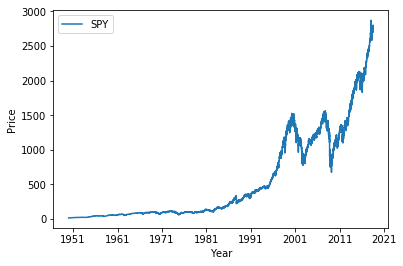

In [84]:
plt.plot(data.index, data['Adj Close'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['SPY'])
plt.show()

In [85]:
data['pct_chg'] = data['Adj Close'].pct_change()[1:]
data.dropna(inplace=True, axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg
Date,,,,,,,
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000,0.011405
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.004748
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.002953
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.005889
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.002927


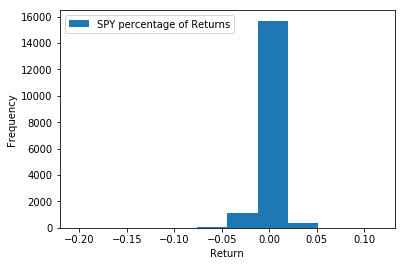

In [86]:
plt.hist(data['pct_chg'])
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['SPY percentage of Returns'])
plt.show()

In [87]:
data['lrets'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data.dropna(inplace=True, axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg,lrets
Date,,,,,,,,
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000,0.004748,0.004737
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000,0.002953,0.002949
1950-01-09,17.080000,17.080000,17.080000,17.080000,17.080000,2520000,0.005889,0.005872
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000,-0.002927,-0.002932
1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000,0.003523,0.003517


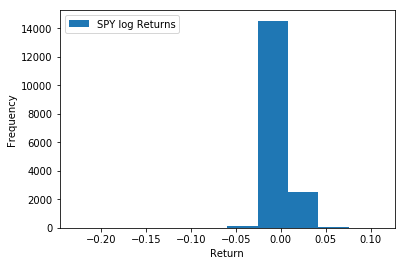

In [88]:
plt.hist(data['lrets'])
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['SPY log Returns'])
plt.show()

In [89]:
def MACD(df, period1, period2, periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean() # Provides exponential weighted functions
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean() 
    
    MACD = EMA1-EMA2
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    return Histogram

In [90]:
def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

In [91]:
def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['High']-df['Low'])
    df['H-PC'] = abs(df['High']-df['Close'].shift(1))
    df['L-PC'] = abs(df['Low']-df['Close'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

In [92]:
macd = MACD(data['Adj Close'], 12, 26,9)
macd.rename(columns={'Close':'MACD'}, inplace=True)
macd.tail()

Date
2018-07-10    0.633687
2018-07-11    1.748863
2018-07-12    4.155845
2018-07-13    5.866535
2018-07-16    6.601378
dtype: float64

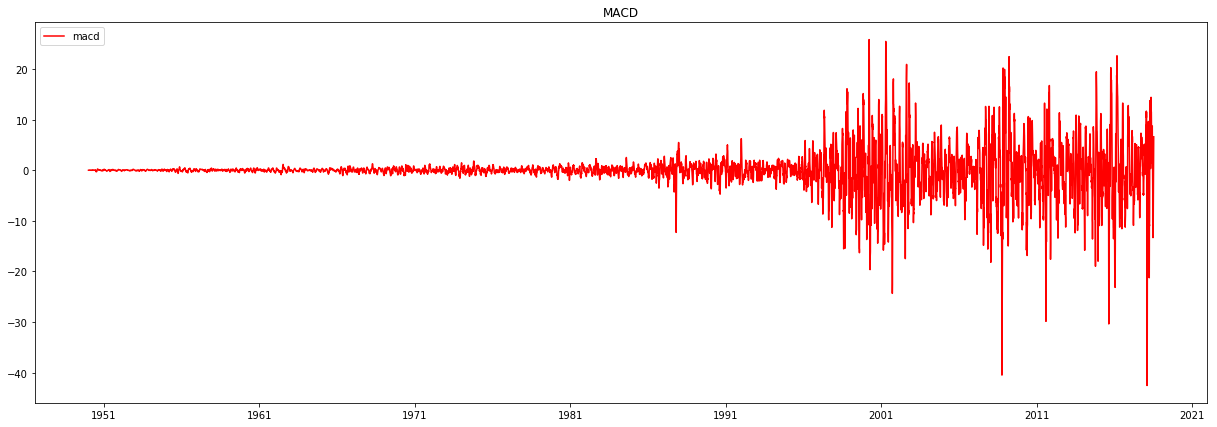

In [93]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

In [94]:
stochastics = stochastics_oscillator(data['Adj Close'], 14)
stochastics.rename(columns={'Close':'Stochastics'}, inplace=True)
stochastics.tail()

Date
2018-07-10    100.000000
2018-07-11     78.961867
2018-07-12    100.000000
2018-07-13    100.000000
2018-07-16     97.167465
dtype: float64

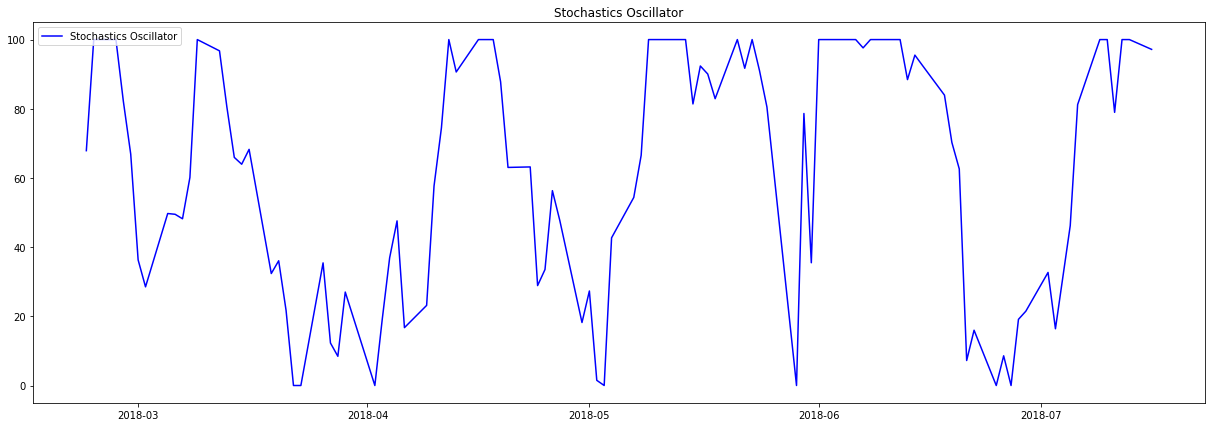

In [95]:
plt.figure(figsize=(21,7))
plt.plot(stochastics[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

In [96]:
atr = ATR(data,14)
atr.rename(columns={0:'ATR'}, inplace=True)
atr.tail()

,ATR
Date,
2018-07-10,11.410156
2018-07-11,23.070068
2018-07-12,25.199951
2018-07-13,12.840088
2018-07-16,7.920166


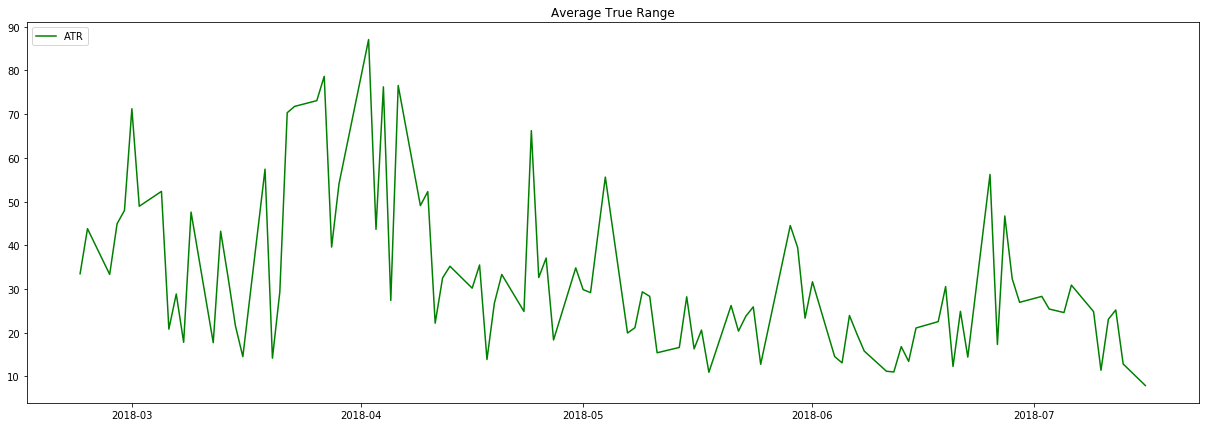

In [97]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

In [98]:
data = pd.concat([data, macd, stochastics, atr], axis=1)

In [99]:
data.rename(columns={0:'MACD', 1:'stochastics'}, inplace=True)

In [100]:
data.drop(['pct_chg', 'H-L', 'H-PC', 'L-PC'], axis=1 , inplace=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,lrets,MACD,stochastics,ATR
Date,,,,,,,,,,
2018-07-10,2788.560059,2795.580078,2786.239990,2793.840088,2793.840088,3063850000,0.003467,0.633687,100.000000,11.410156
2018-07-11,2779.820068,2785.909912,2770.770020,2774.020020,2774.020020,2964740000,-0.007119,1.748863,78.961867,23.070068
2018-07-12,2783.139893,2799.219971,2781.530029,2798.290039,2798.290039,2821690000,0.008711,4.155845,100.000000,25.199951
2018-07-13,2796.929932,2804.530029,2791.689941,2801.310059,2801.310059,2614000000,0.001079,5.866535,100.000000,12.840088
2018-07-16,2797.360107,2801.189941,2793.389893,2798.429932,2798.429932,2812230000,-0.001029,6.601378,97.167465,7.920166


In [101]:
data.to_csv(r'C:\Users\tbrti\Desktop\Nani\PACEDS\Course_Project\Data\technical_data.csv', index=True)

In [72]:
from  pyspark.sql  import SparkSession